In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np



In [16]:
DATASET_PATH = r"C:\Users\ANAM KHAN\Downloads\potato-disease-classification-main\potato-disease-classification-main\Dataset\PlantVillage"

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Re-create the Data Generator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

# Load the Dataset Again
train_generator = train_datagen.flow_from_directory(
    DATASET_PATH,  
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

# Check Class Indices
print("✅ Classes Detected by TensorFlow:", train_generator.class_indices)



Found 6536 images belonging to 4 classes.
✅ Classes Detected by TensorFlow: {'Non_Potato': 0, 'Potato_Early_Blight': 1, 'Potato_Healthy': 2, 'Potato_Late_Blight': 3}


In [19]:
# Initialize Data Generators
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=30,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2,  
    zoom_range=0.2,  
    horizontal_flip=True,  
    fill_mode="nearest"
)

In [20]:
valid_datagen = ImageDataGenerator(rescale=1.0/255)  

In [21]:
import os

DATASET_PATH = r"C:\Users\ANAM KHAN\Downloads\potato-disease-classification-main\potato-disease-classification-main\Dataset\PlantVillage"


non_potato_path = os.path.join(DATASET_PATH, "Non_Potato")
print("Does 'Non_Potato' folder exist?", os.path.exists(non_potato_path))


if os.path.exists(non_potato_path):
    num_images = len(os.listdir(non_potato_path))
    print("Number of images in 'Non_Potato':", num_images)


Does 'Non_Potato' folder exist? True
Number of images in 'Non_Potato': 1026


In [22]:
train_labels = train_generator.classes
train_class_counts = collections.Counter(train_labels)

for class_id, count in train_class_counts.items():
    class_name = list(train_generator.class_indices.keys())[class_id]  
    print(f"{class_name}: {count} images")


NameError: name 'collections' is not defined

In [23]:
import tensorflow as tf

BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "D:\major_proj\PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(256, 256),
    batch_size=BATCH_SIZE
)

class_names = dataset.class_names
print("Updated Classes: ", class_names)


Found 6536 files belonging to 4 classes.
Updated Classes:  ['Non_Potato', 'Potato_Early_Blight', 'Potato_Healthy', 'Potato_Late_Blight']


In [93]:
import tensorflow as tf

BATCH_SIZE = 32
IMAGE_SIZE = (256, 256)

dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "D:/major_proj/PlantVillage",
    seed=123,
    shuffle=True,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_names=['Non_Potato', 'Potato_Early_Blight', 'Potato_Late_Blight', 'Potato_Healthy']  # ✅ Explicit Class Names
)

class_names = dataset.class_names
print("✅ Updated Classes: ", class_names)


Found 6536 files belonging to 4 classes.
✅ Updated Classes:  ['Non_Potato', 'Potato_Early_Blight', 'Potato_Late_Blight', 'Potato_Healthy']


In [81]:
import collections


train_labels = train_generator.classes
train_class_counts = collections.Counter(train_labels)


for class_id, count in train_class_counts.items():
    print(f"{CLASS_NAMES[class_id]}: {count} images")


Late Blight: 1000 images
Healthy: 1000 images
Non-Potato: 1162 images


In [50]:
# dataset splitting
train_size = int(0.8 * len(dataset))  # 80% of dataset
val_size = int(0.1 * len(dataset))    # 10% of dataset

train_ds = dataset.take(train_size)  # Take first 80%
test_ds = dataset.skip(train_size)   # Skip first 80% to get remaining 20%

val_ds = test_ds.take(val_size)      # Take 10% for validation
test_ds = test_ds.skip(val_size)     # Remaining 10% for final testing

print(f"Training set: {len(train_ds)}")
print(f"Validation set: {len(val_ds)}")
print(f"Test set: {len(test_ds)}")


Training set: 164
Validation set: 20
Test set: 21


In [51]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [52]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)


In [53]:
len(train_ds)

164

In [54]:
len(val_ds)

20

In [55]:
len(test_ds)

21

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# Define the CNN model
def build_custom_cnn():
    model = Sequential()

    # First Convolutional Block
    model.add(Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(224, 224, 3)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Second Convolutional Block
    model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Third Convolutional Block
    model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Fourth Convolutional Block
    model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))  # Reduce Overfitting
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(4, activation='softmax'))  # 4 output classes

    return model

# Compile the model
model = build_custom_cnn()
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Model Summary
model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 4)                   │           1,028 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,213,316 (100.00 MB)

 Trainable params: 26,212,356 (99.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.7, 1.3],  # Adjust brightness
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale validation data

train_generator = train_datagen.flow_from_directory(
    "D:/major_proj/potato_tomato_dataset/PlantVillage",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"  # Ensure one-hot encoded labels
)

valid_generator = valid_datagen.flow_from_directory(
    "D:/major_proj/potato_tomato_dataset/PlantVillage",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)


Found 3162 images belonging to 4 classes.
Found 3162 images belonging to 4 classes.


In [58]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    epochs=50,  # Train for up to 50 epochs (will stop early if needed)
    validation_data=valid_generator,
    callbacks=[early_stop]
)

# Save the trained model
model.save("cnn_potato_disease_model.keras")


Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.6304 - loss: 8.1545 - val_accuracy: 0.3219 - val_loss: 11.1895
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.8167 - loss: 3.3450 - val_accuracy: 0.3178 - val_loss: 11.8412
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.8611 - loss: 2.0353 - val_accuracy: 0.3188 - val_loss: 12.0796
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.8827 - loss: 1.0089 - val_accuracy: 0.3719 - val_loss: 4.1250
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 190s 2s/step - accuracy: 0.8971 - loss: 0.6825 - val_accuracy: 0.7729 - val_loss: 0.5945
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.8967 - loss: 0.5488 - val_accuracy: 0.6727 - val_loss: 1.0914
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.9008 - loss: 0.4257 - val_accuracy: 0.8827 - val_loss: 0.4959
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.9280 - loss: 0.3108 - val_accuracy: 0.9655 

In [65]:
test_generator = valid_datagen.flow_from_directory(
    "D:/major_proj/potato_tomato_dataset/PlantVillage",
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical"
)

# Evaluate the model
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc * 100:.2f}%")


Found 3162 images belonging to 4 classes.
99/99 ━━━━━━━━━━━━━━━━━━━━ 28s 268ms/step - accuracy: 0.9838 - loss: 0.0843
Test Accuracy: 98.17%


In [66]:
import tensorflow as tf

# Load the trained model
model = tf.keras.models.load_model("cnn_potato_disease_model.keras")  


In [67]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Define the class names (Modify based on your dataset)
CLASS_NAMES = ["Early Blight", "Late Blight", "Healthy", "Non-Potato"]

def predict_image(img_path, model):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(224, 224))  # Resize to match model input
    img_array = image.img_to_array(img)  # Convert to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize (same as training)

    # Make a prediction
    predictions = model.predict(img_array)
    predicted_class = CLASS_NAMES[np.argmax(predictions[0])]
    confidence = np.max(predictions[0]) * 100  # Convert confidence to percentage

    # Display the image
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"Predicted: {predicted_class} ({confidence:.2f}%)")
    plt.show()

    # Return prediction
    return predicted_class, confidence


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step


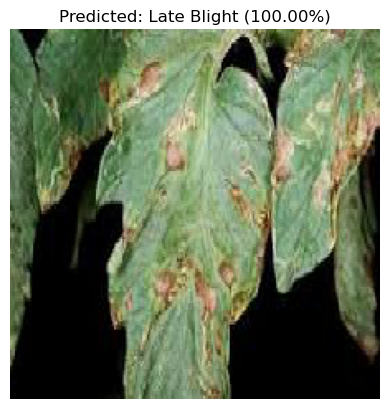

Predicted Class: Late Blight
Confidence: 100.00%


In [68]:
# Provide the path to a real-world image
img_path = r"D:\downloads\images (5).jpg"# Change this

# Make a prediction
predicted_class, confidence = predict_image(img_path, model)

print(f"Predicted Class: {predicted_class}")
print(f"Confidence: {confidence:.2f}%")


In [69]:
import os
from collections import Counter

# Path to dataset directories
data_dir = "D:\major_proj\PlantVillage"

# Count images per class
class_counts = {cls: len(os.listdir(os.path.join(data_dir, cls))) for cls in os.listdir(data_dir)}

print("🔍 Class Distribution:", class_counts)


🔍 Class Distribution: {'Non_Potato': 1026, 'Potato___Early_blight': 2000, 'Potato___healthy': 1086, 'Potato___Late_blight': 2424}


In [71]:
import os


save_dir = r"C:\Users\ANAM KHAN\Downloads\potato-disease-classification-main\potato-disease-classification-main\saved_models\5"  # Change this to your desired path

# Create the directory if it doesn’t exist
os.makedirs(save_dir, exist_ok=True)

# Save the model
model.save(os.path.join(save_dir, "potato_disease_model1.keras"))

print(f"Model saved to: {os.path.join(save_dir, 'potato_disease_model.keras')}")


Model saved to: C:\Users\ANAM KHAN\Downloads\potato-disease-classification-main\potato-disease-classification-main\saved_models\5\potato_disease_model.keras


Validation And Performance Matrices 

Training & Validation Accuracy/Loss

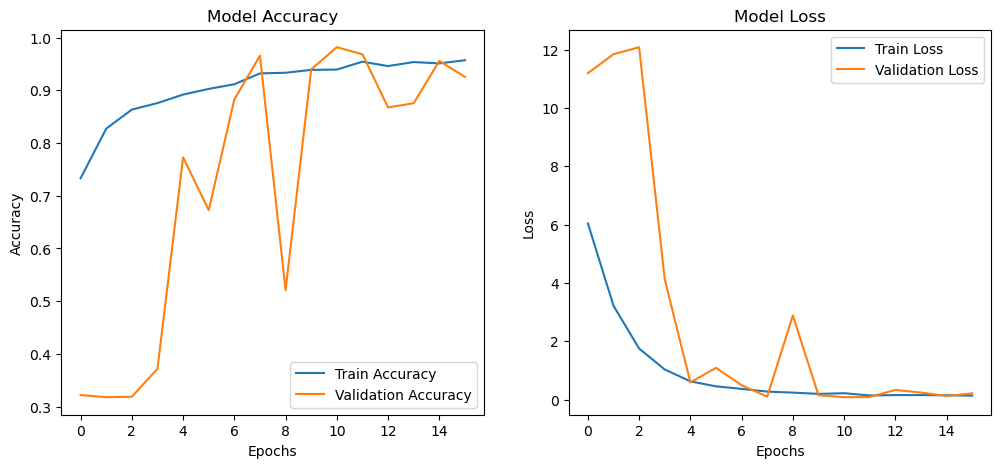

In [72]:
import matplotlib.pyplot as plt


def plot_training_history(history):
    plt.figure(figsize=(12, 5))

    # 🔹 Plot Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Model Accuracy')

    # 🔹 Plot Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Model Loss')

    plt.show()


plot_training_history(history)


Confusion Matrix

99/99 ━━━━━━━━━━━━━━━━━━━━ 30s 297ms/step


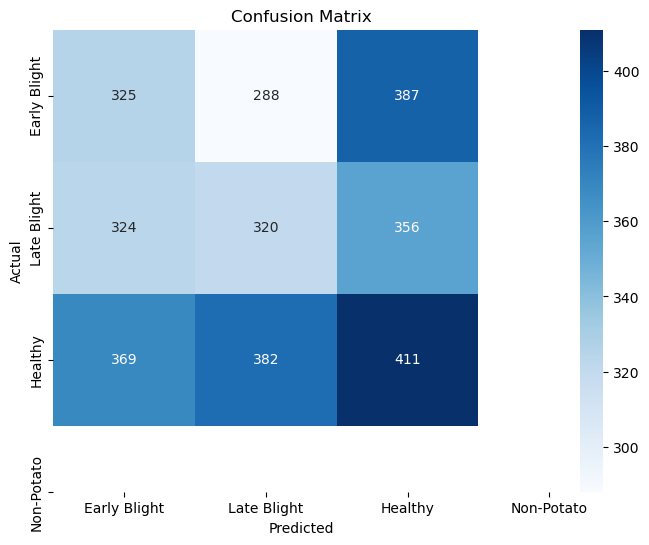

In [73]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Get model predictions on validation set
y_pred = model.predict(valid_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true = valid_generator.classes  # True labels

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=CLASS_NAMES, yticklabels=CLASS_NAMES)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Precision, Recall & F1-Score

In [75]:
import numpy as np

print("Unique Classes in True Labels:", np.unique(y_true))
print("Unique Classes in Predicted Labels:", np.unique(y_pred_classes))
print("CLASS_NAMES Defined:", CLASS_NAMES)


🔍 Unique Classes in True Labels: [1 2 3]
🔍 Unique Classes in Predicted Labels: [1 2 3]
🔍 CLASS_NAMES Defined: ['Early Blight', 'Late Blight', 'Healthy', 'Non-Potato']


In [76]:
from sklearn.metrics import classification_report


labels = list(range(len(CLASS_NAMES)))  

# Generate the report
report = classification_report(y_true, y_pred_classes, labels=labels, target_names=CLASS_NAMES, zero_division=1)
print("🔍 Classification Report:\n", report)


🔍 Classification Report:
               precision    recall  f1-score   support

Early Blight       1.00      1.00      1.00         0
 Late Blight       0.32      0.33      0.32      1000
     Healthy       0.32      0.32      0.32      1000
  Non-Potato       0.36      0.35      0.35      1162

   micro avg       0.33      0.33      0.33      3162
   macro avg       0.50      0.50      0.50      3162
weighted avg       0.33      0.33      0.33      3162



In [77]:
import collections

# Check number of images per class in training set
train_labels = train_generator.classes
train_class_counts = collections.Counter(train_labels)

# Print dataset distribution
for class_id, count in train_class_counts.items():
    print(f"{CLASS_NAMES[class_id]}: {count} images")


Late Blight: 1000 images
Healthy: 1000 images
Non-Potato: 1162 images
